## Kmeans y Herarchical 
_Andrés G. López A. Análisis de Datos 202016908 Grupo 52_

In [1]:
#Importamos las librerias 
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Cargamos datos
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Se valida información
dataset.shape

(200, 5)

In [4]:
#Validar información básica
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Verificar datos nulos
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

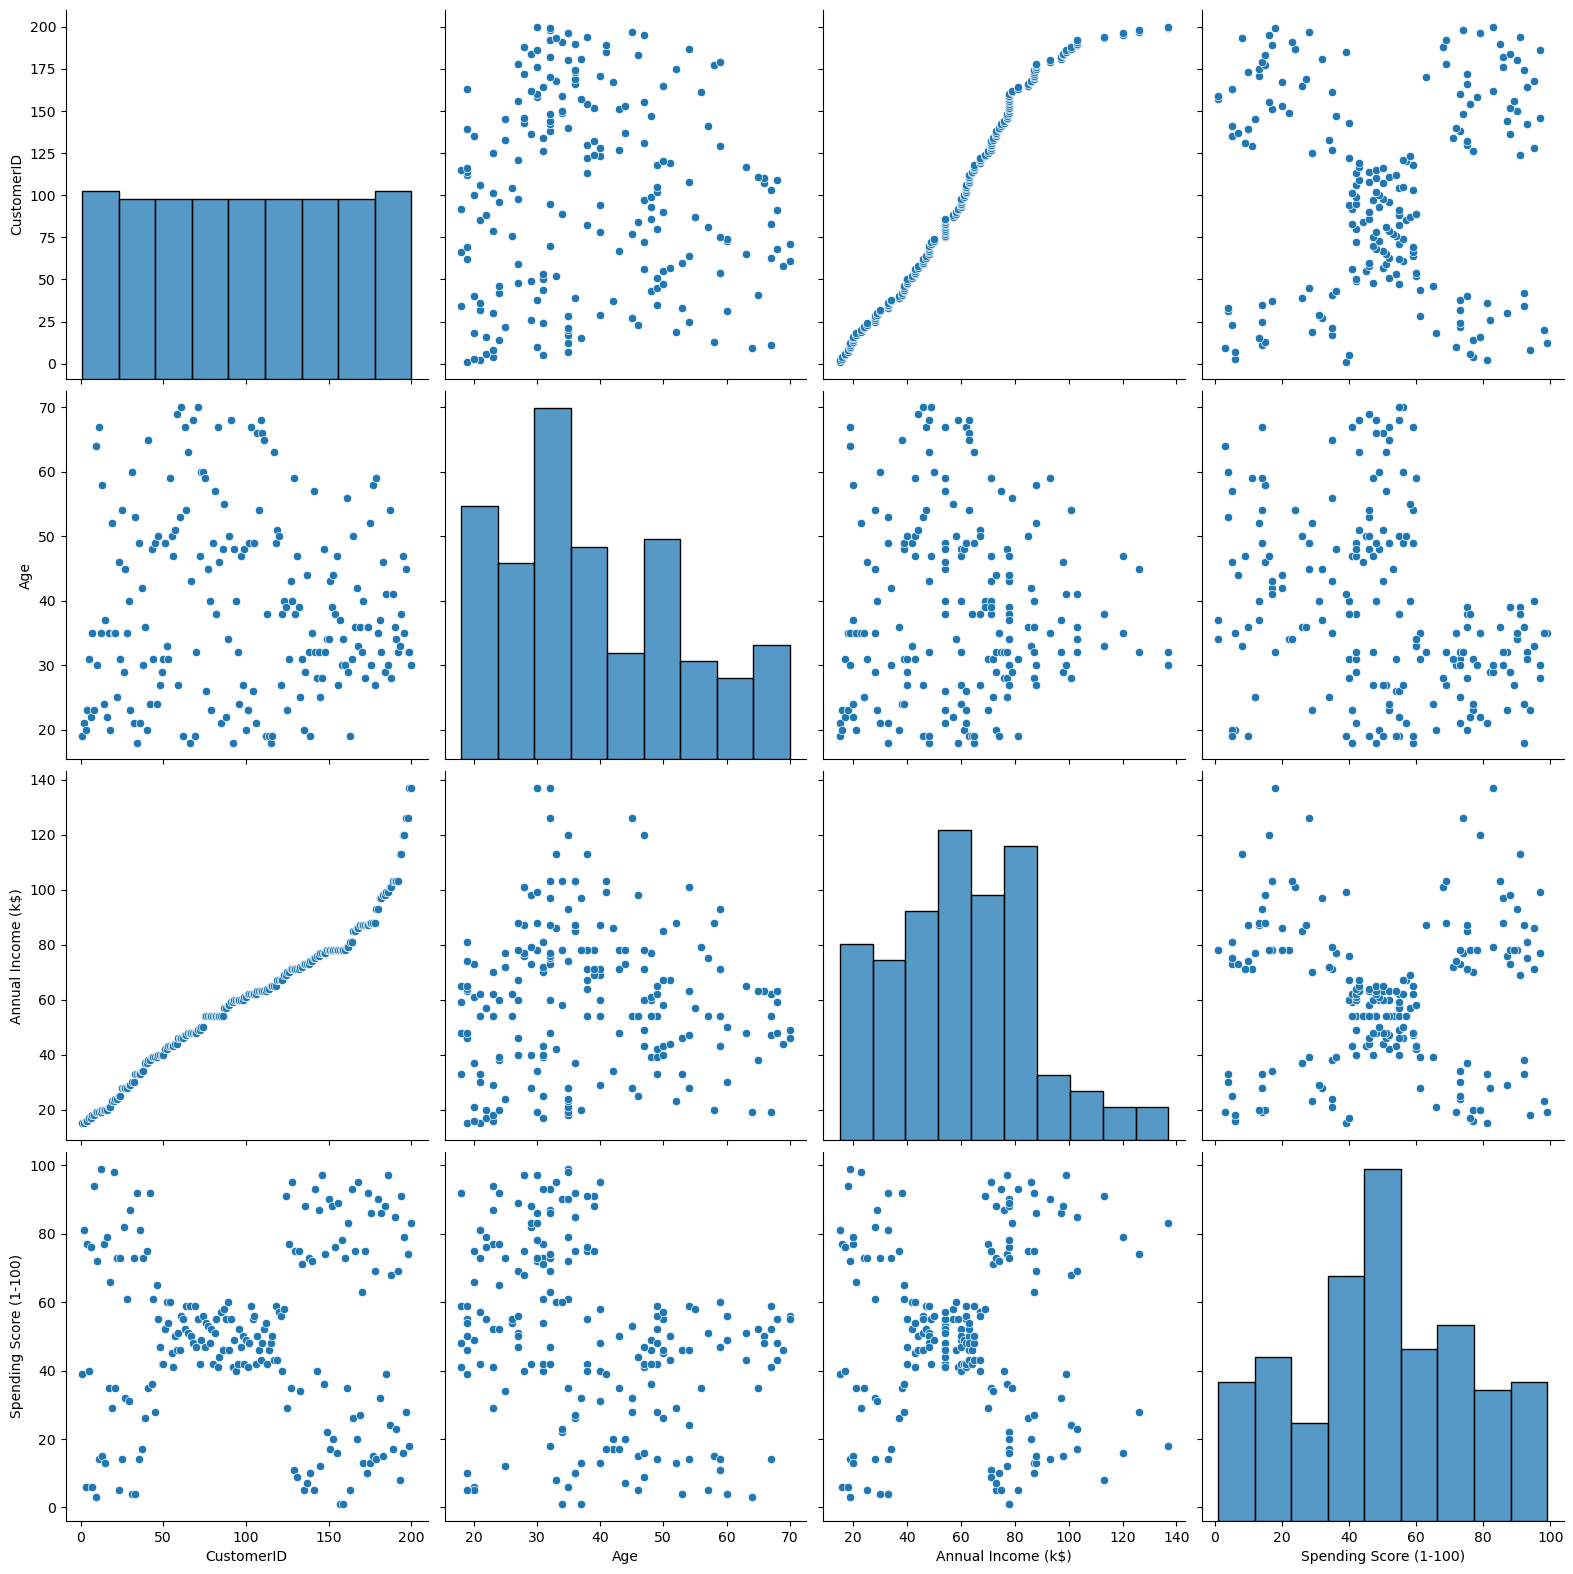

In [6]:
sns.pairplot(dataset.dropna(), size=4,kind='scatter')

In [7]:
# Matriz de correlación
corr_matrix = dataset.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

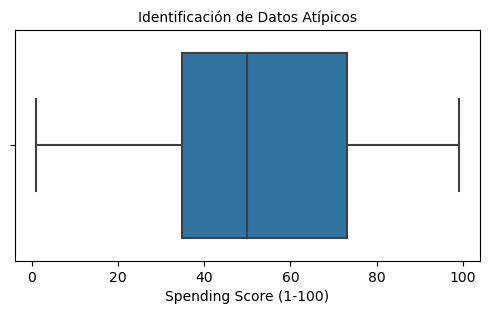

In [8]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=dataset['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Filtrar columnas del modelo 
Datos = dataset[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [11]:
Datos.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# K-MEANS

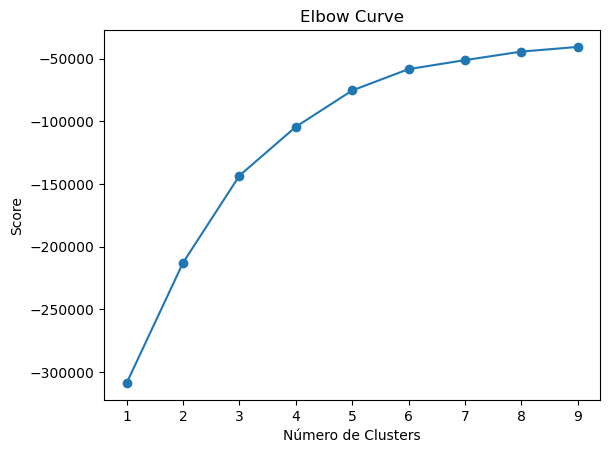

In [12]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4).fit(Datos)
centroids = kmeans.cluster_centers_
centroids

array([[40.39473684, 87.        , 18.63157895],
       [24.82142857, 28.71428571, 74.25      ],
       [44.89473684, 48.70526316, 42.63157895],
       [32.69230769, 86.53846154, 82.12820513]])

In [14]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 


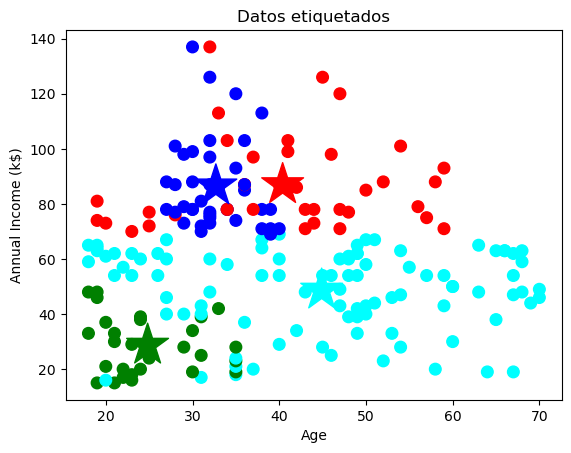

In [15]:
f1 = Datos['Age'].values
f2 = Datos['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

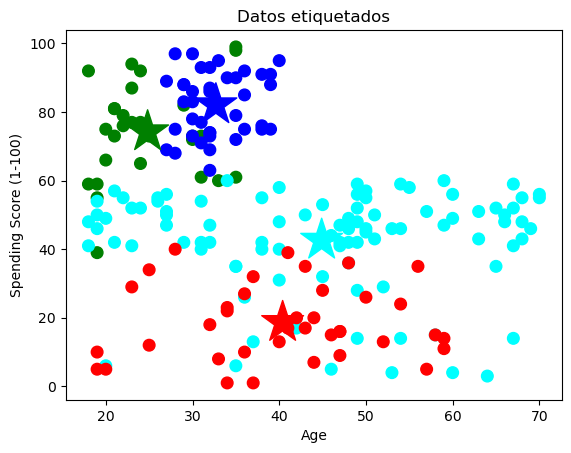

In [16]:
f1 = Datos['Age'].values
f2 = Datos['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

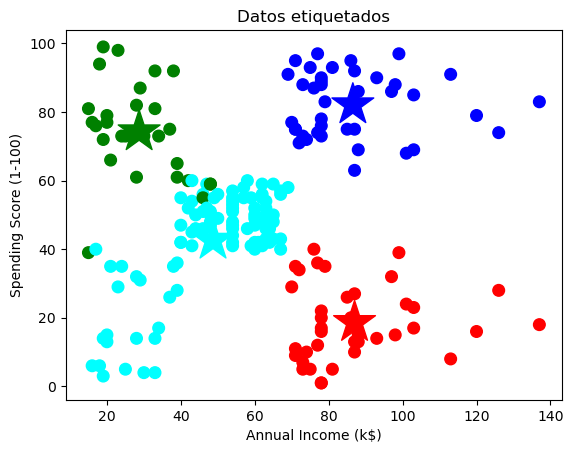

In [17]:
f1 = Datos['Annual Income (k$)'].values
f2 = Datos['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [18]:
scaler = StandardScaler()
X_new = scaler.fit_transform(np.array([[20,31,40]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[2]
['cyan']


## Medidas de calidad para K-Means

In [19]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(Datos, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(Datos, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(Datos, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.40546302077733304
Índice de Calinski-Harabasz: 127.98382948189192
Inertia (suma de cuadrados dentro de los clusters): 104366.15145556198
Davies-Bouldin Index: 0.8914904209843171


# Hierarchical Clustering

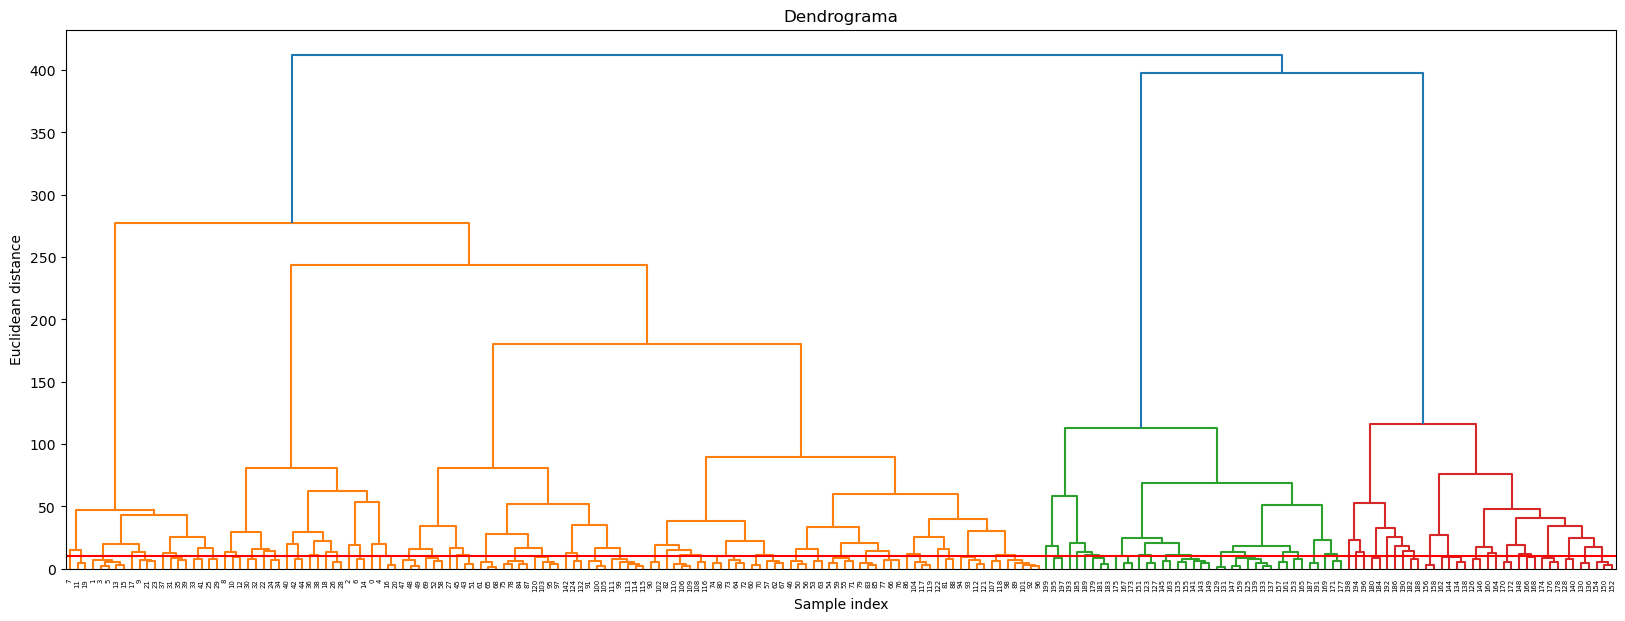

In [20]:
ward_clustering = linkage(Datos, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [21]:
hier_clustering = AgglomerativeClustering(n_clusters=4)
labels_hier = hier_clustering.fit_predict(Datos)
labels_hier

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [22]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

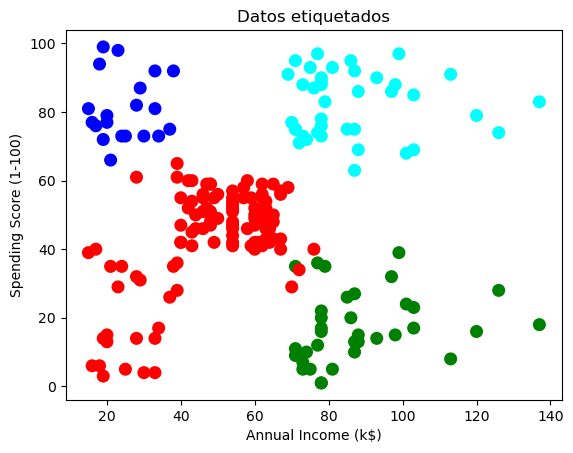

In [23]:
f1 = Datos['Annual Income (k$)'].values
f2 = Datos['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [24]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

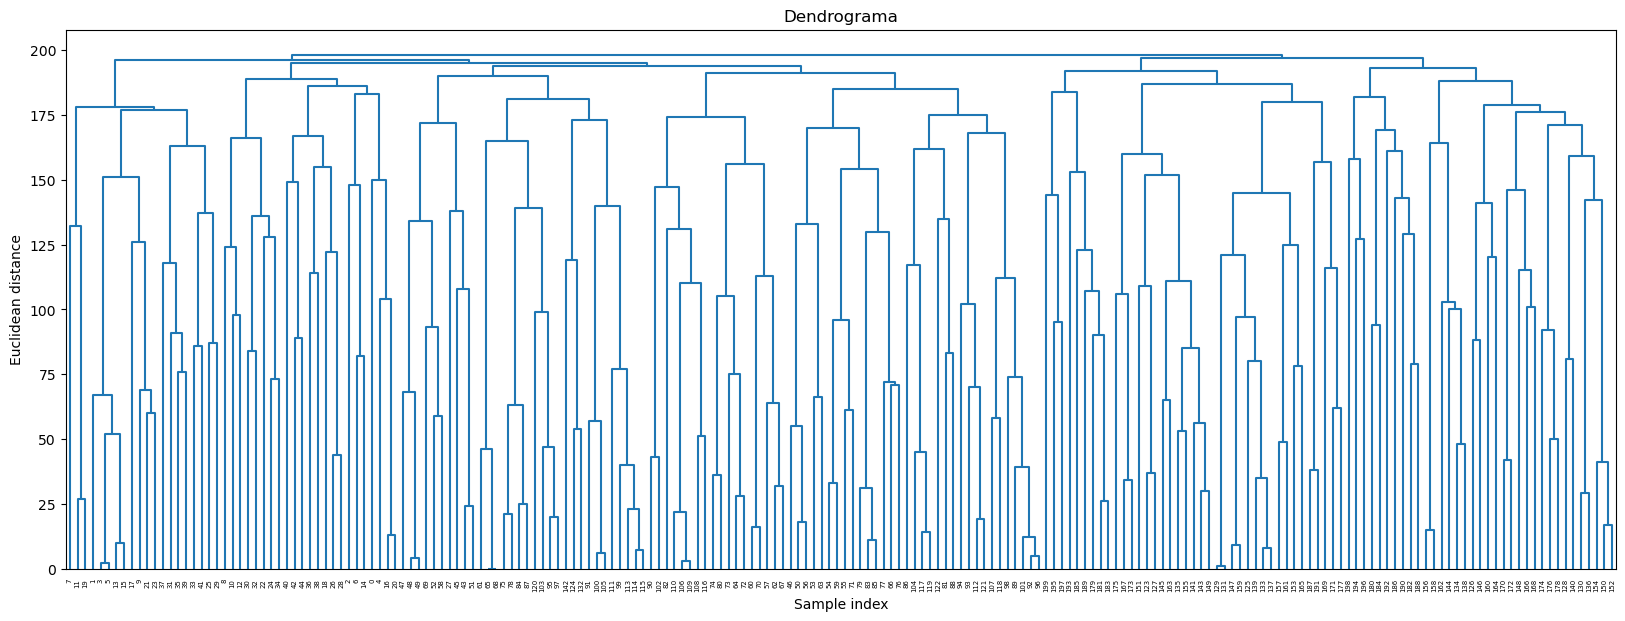

In [25]:
plot_dendrogram(hier_clustering, color_threshold=0)

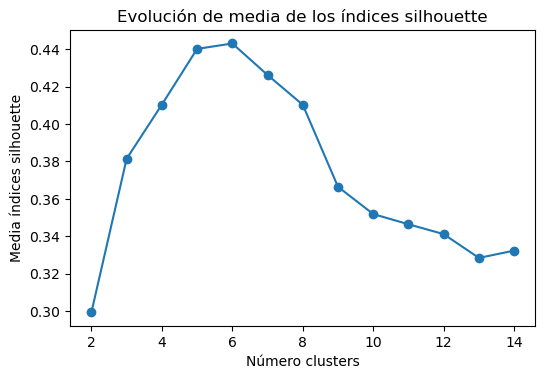

In [26]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(Datos)
    silhouette_avg = silhouette_score(Datos, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [27]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(Datos, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(Datos, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(Datos, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.41037986351850747
Índice de Calinski-Harabasz: 124.30185054821396
Davies-Bouldin Index: 0.8330032019223427


In [28]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(Datos)
# Compute the linkage matrix
Z = linkage(Datos, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.66866802140347, array([277.42153431,  53.60747993, 277.42153431, ..., 397.74740753,
        18.27566688, 397.74740753]))
